<a href="https://colab.research.google.com/github/motokikando/bayes_modeling/blob/master/pystan_simple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Googleドライブをマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
#必要なモジュールのインポート
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pystan 
%matplotlib inline

In [3]:
#スタイルの指定
plt.style.use("ggplot")

In [6]:
file_path = '/content/drive/My Drive/ベイズ統計学/pystan_data/real_estate1.xlsx'
df = pd.read_excel(file_path)

In [7]:
df.head()

,id,space,room,value
0,1,50,2LDK,3050
1,2,70,2LDK,4690
2,3,70,2SLDK,4830
3,4,70,3LDK,5040
4,5,90,3LDK,6570


In [8]:
#独立変数xをsapceとして従属変数y　価格valueを予測したい

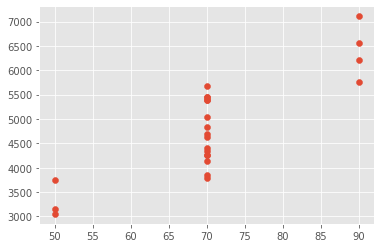

In [9]:
#散布図の作成
plt.scatter(df["space"],df["value"])

In [11]:
#san_modelの記述
stan_model = """
 data {
    int N; #物件数
    real X[N]; #space 部屋の大きさ
    real Y[N]; #vlue 物件の価格
 }

 #パラメータの指定 a(傾き),b(切片),σ(ばらつき)
 parameters {
   real a;
   real b;
   real <lower=0> sigma;
 }

#modelの記述
model {
  for (n in 1:N){
    Y[n] ~ normal(a*X[n] +b, sigma); #平均値がax+b, 誤差がsigmaになるような正規分布を指定
  }
}
 """

In [12]:
#コンパイル
sm = pystan.StanModel(model_code=stan_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_42c5b352657f9059aa79c992ca5bb5b0 NOW.


In [13]:
#dataを辞書型で定義
stan_data = {"N":df.shape[0], "X": df["space"], "Y":df["value"]}

In [14]:
#mcmcサンプリング
fit = sm.sampling(data= stan_data, iter=2000, warmup=500, chains=3, seed=123)

In [15]:
fit

Inference for Stan model: anon_model_42c5b352657f9059aa79c992ca5bb5b0.
3 chains, each with iter=2000; warmup=500; thin=1; 
post-warmup draws per chain=1500, total post-warmup draws=4500.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a      77.96    0.32  11.81  55.66  70.03  77.63  85.38 102.24   1380    1.0
b     -691.7   23.07  847.9  -2453  -1219 -673.4 -119.0 883.25   1351    1.0
sigma 613.35    2.54 102.98  448.8 539.07 600.34 670.48 865.31   1640    1.0
lp__  -152.0    0.03   1.35 -155.4 -152.6 -151.6 -151.0 -150.5   1487    1.0

Samples were drawn using NUTS at Sun Jan 16 06:56:43 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

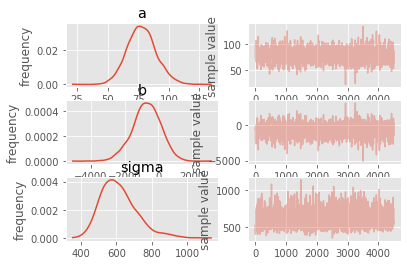

In [17]:
#事後分布を見てみる
fig = fit.plot()

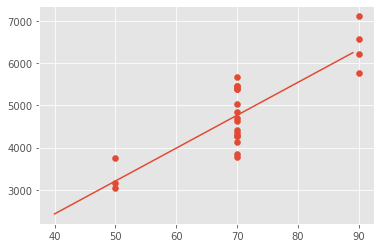

In [21]:
#散布図に回帰直線を引いてみる
a = 77.96
b = -691.7
x = np.arange(40, 90, 1)
y = a * x + b
plt.plot(x, y)
plt.scatter(df["space"], df["value"])